#  How to deal with an imbalanced datatset 🥺

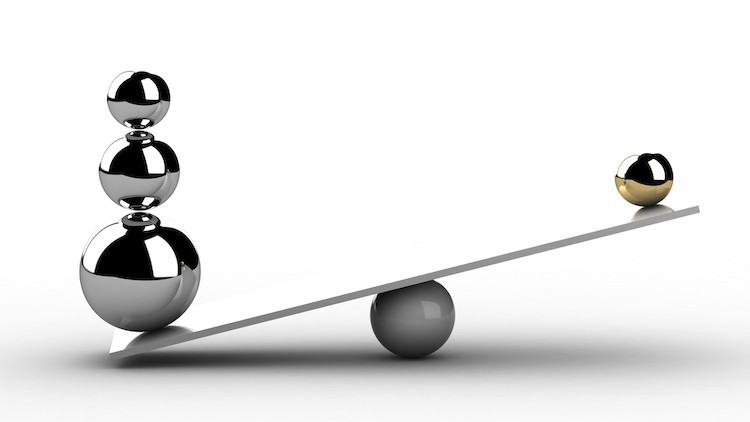

## Introduction

The purpose of this notebook is to show what is an imbalanced dataset and which are some of the techniques available in Python to deal with. I am going to compare the effectiveness of one another applying to the " _HR Analytics: Job Change of Data Scientists_ " dataset. You can access to the data [here](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)

I hope you to enjoy this notebook. Don't forget to write any suggestion in the comment section. Not only will you help me out increasing the level of this notebook but you also will help me to improve my knowledge. 🤜🤛

## Data context 

A company wants to hire new data scientist for the team. Candidates have previously passed some courses conducted by the company. The company wants to ensure that each candidate wants to work with them since it will boost the recruitment process. Based on some variables, How can they ensure hiring process is going to be excellent? 🤔

## 🕵️ Exploratory Data Analysis (EDA)

To begin with, let's import all libraries needed

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Load the data

In [ ]:
train = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
train.head(7)

We can check some information about the data

In [ ]:
train.info()

As regards with the variables, most of them are categorical and have missing values, thus, let's deal with them.

In [ ]:
Tr_total = train.isnull().sum().sort_values(ascending = False)
Tr_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)

Tr_missing_data = pd.concat([Tr_total,Tr_percent], axis = 1, keys = ['Total', 'Percent'])
Tr_missing_data.head(9)

One strategy can be to fill all the _NA_ with the mode of each column.

In [ ]:
for feature in Tr_missing_data.index:
    train[feature] = train[feature].fillna(train[feature].mode()[0])

Now, let's work with numeric variables

In [ ]:
numeric_variables = train.select_dtypes(include= [np.number])
numeric_variables.columns
numeric_variables = numeric_variables.drop(columns = 'target' , axis = 1)

### Visualization of numeric variables

In [ ]:
#City Development

plt.subplots(sharex = True , figsize= (10,5))
plt.suptitle('City Development', size=16, y=(0.94))
sns.distplot(numeric_variables['city_development_index'], hist= True)
plt.show()

In [ ]:
#Training Hours

plt.subplots(sharex = True , figsize= (10,5))
plt.suptitle('Training Hours', size=16, y=(0.94))
sns.distplot(numeric_variables['training_hours'], hist= True)
plt.show()

Due to the fact that the majority of the variables are categorical, one option is to discretize these numeric variables in order to transform them into categorical.

In [ ]:
train['training_hours'] = pd.cut(train['training_hours'] ,bins = 3 , labels = ['long' , 'medium_long', 'short'])

train['city_development_index'] = pd.cut(train['city_development_index'] ,bins = 3 , labels = ['nothing' , 'moreorless', 'a_lot'])

It's the turn of the categorical variables

In [ ]:
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.columns

### 🎨 Visualization of categorical variables

In [ ]:
def number_categories(categoricals): 
    c_count = 0
    height = 6
    width = 2
    fig, axes = plt.subplots(height, width, sharex=True, figsize=(20,23))
    plt.suptitle('Number of categorical variables', size=16, y=(0.94))
    
    for row in range(height):
        for col in range(width):
            c_idx = categoricals.columns[c_count]
            c_data = categoricals[c_idx].value_counts()
            sns.barplot(x = c_data.values, y = c_data.index, palette='deep', ax=axes[row, col])
            axes[row,col].set_title(c_idx)
            c_count= c_count + 1

number_categories(categoricals)

In [ ]:
sns.countplot(train['target'])

In this plot the dataset imbalanced can be seen. This can be confused for both model and metrics. 😕

The following preprocessing step is not always correct. I am going to concatenate some categories between them in order to have approximately the same number of categories per variable.

In [ ]:
#Fix experience values

train['experience'].replace(to_replace = '<1',
                      value = 'a_few', inplace = True )
train['experience'].replace(to_replace = '1',
                      value = 'a_few', inplace = True )
train['experience'].replace(to_replace = '2',
                      value = 'a_few', inplace = True )
train['experience'].replace(to_replace = '3',
                      value = 'a_few', inplace = True )
train['experience'].replace(to_replace = '4',
                      value = 'a_few', inplace = True )
train['experience'].replace(to_replace = '5',
                      value = 'a_few', inplace = True )    
train['experience'].replace(to_replace = '6',
                      value = 'medium', inplace = True )      
train['experience'].replace(to_replace = '7',
                      value = 'medium', inplace = True )      
train['experience'].replace(to_replace = '8',
                      value = 'medium', inplace = True )
train['experience'].replace(to_replace = '9',
                      value = 'medium', inplace = True )
train['experience'].replace(to_replace = '10',
                      value = 'medium', inplace = True )
train['experience'].replace(to_replace = '11',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '12',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '13',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '14',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '15',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '16',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '17',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '18',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '19',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '20',
                      value = 'high', inplace = True )
train['experience'].replace(to_replace = '>20',
                      value = 'high', inplace = True )



#Fix company size

train['company_size'].replace(to_replace = '<10',
                      value = 'small_size', inplace = True )
train['company_size'].replace(to_replace = '10/49',
                      value = 'small_size', inplace = True )
train['company_size'].replace(to_replace = '50-99',
                      value = 'small_size', inplace = True )
train['company_size'].replace(to_replace = '100-500',
                      value = 'medium_size', inplace = True )
train['company_size'].replace(to_replace = '500-999',
                      value = 'medium_size', inplace = True )
train['company_size'].replace(to_replace = '1000-4999',
                      value = 'big_size', inplace = True )
train['company_size'].replace(to_replace = '5000-9999',
                      value = 'big_size', inplace = True )
train['company_size'].replace(to_replace = '10000+',
                      value = 'big_size', inplace = True )


#Fix last new job

train['last_new_job'].replace(to_replace = 'never',
                      value = 'fresher', inplace = True )
train['last_new_job'].replace(to_replace = '1',
                      value = 'fresher', inplace = True )
train['last_new_job'].replace(to_replace = '2',
                      value = 'medium_time', inplace = True )
train['last_new_job'].replace(to_replace = '3',
                      value = 'medium_time', inplace = True )
train['last_new_job'].replace(to_replace = '4',
                      value = 'medium_time', inplace = True )
train['last_new_job'].replace(to_replace = '>4',
                      value = 'long_time', inplace = True )

Plotting again the variables

In [ ]:
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.columns

number_categories(categoricals) #plot

It goes without saying that variables as _city_ and _enrollee id_ are not relevant

In [ ]:
train = train.drop(columns = ['city' , 'enrollee_id'] , axis = 1)


#Fix resampling errors in columns [repetitive names]

train['major_discipline'].replace(to_replace = 'Other', value = 'Other_1', inplace = True )
train['company_type'].replace(to_replace = 'Other', value = 'Other_2', inplace = True )

The dataset contains categorical variables and Python modelling libraries as _sklearn_ cannot model them. Thus, getting dummies is necessary:

In [ ]:
gd_city_development_index = pd.get_dummies(train[['city_development_index']], drop_first=True, prefix=[None])
gd_gender = pd.get_dummies(train[['gender']] , drop_first=True, prefix=[None])
gd_relevent_experience = pd.get_dummies(train[['relevent_experience']], drop_first=True, prefix=[None])
gd_enrolled_university = pd.get_dummies(train[['enrolled_university']], drop_first=True, prefix=[None])
gd_education_level = pd.get_dummies(train[['education_level']], drop_first=True ,prefix=[None])
gd_major_discipline = pd.get_dummies(train[['major_discipline']], drop_first=True, prefix=[None])
gd_experience = pd.get_dummies(train[['experience']],  drop_first=True, prefix=[None])
gd_company_size = pd.get_dummies(train[['company_size']], drop_first=True, prefix=[None])
gd_company_type = pd.get_dummies(train[['company_type']], drop_first=True, prefix=[None])
gd_last_new_job = pd.get_dummies(train[['last_new_job']], drop_first=True, prefix=[None])
gd_training_hours = pd.get_dummies(train[['training_hours']], drop_first=True, prefix=[None])

In [ ]:
#Drop original columns

to_drop = ['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours']

train = train.drop(columns = to_drop , axis = 1)


data = pd.concat([train, gd_city_development_index, gd_gender, gd_relevent_experience,
                  gd_enrolled_university, gd_education_level, gd_major_discipline, 
                  gd_experience, gd_company_size, gd_company_type,
                  gd_last_new_job, gd_training_hours ], axis = 1)


data.head(7)

## 🤖 Modelling

### What is an imbalanced dataset?

An imbalanced dataset is a special case for classification problem where the class distribution is not uniform among the classes. Typically, they are composed by two classes: The majority (negative) class and the minority (positive) class. When we speak about the distribution is not uniform it means that it is biased or skewed.

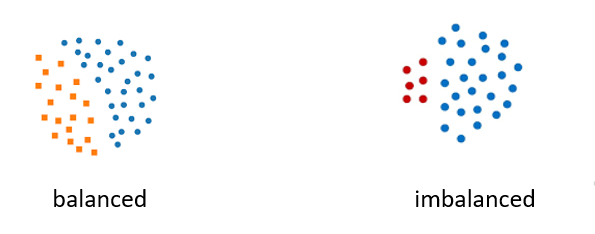

### Why should we fix it?

Most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

### How can we deal with it?

Using the library _imlearn_ we can apply techniques which will balance our dataset. Some of them are:

**RUS:** Randomly take examples from the majority class and delete them from the training.

**ROS:** Randomly take examples from the minority class and add them to the training

**Tomek Link:** Looks for Tomek Links ( pairs of opposing instances that are very close together) and removes the majority instance.

**SMOTE:** It aims to enrich the minority class boundaries by creating artificial examples in the minority class.

**SMOTE & Tomek Link:** Over-sampling using SMOTE and cleaning using Tomek Links.

In [ ]:
#Separe the data

X = data.drop(columns = 'target' , axis = 1)                           
Y = data['target']

In [ ]:
#Define resampling strategies

RUS = RandomUnderSampler()
ROS = RandomOverSampler()
TL = TomekLinks(sampling_strategy='majority')
SMT = SMOTE(sampling_strategy='minority')
SMTL = SMOTETomek(sampling_strategy='auto')

#Apply them

X_rus, Y_rus = RUS.fit_sample(X,Y)
X_ros, Y_ros = ROS.fit_sample(X,Y)
X_tl, Y_tl = TL.fit_sample(X,Y)
X_smt, Y_smt = SMT.fit_sample(X, Y)
X_smtl, Y_smtl = SMTL.fit_sample(X, Y)


X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X_rus, Y_rus, test_size = 0.2 ,random_state = 2020)
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros, Y_ros, test_size = 0.2 ,random_state = 2020)
X_train_tl, X_test_tl, Y_train_tl, Y_test_tl = train_test_split(X_tl, Y_tl,test_size = 0.2 ,random_state = 2020)
X_train_smt, X_test_smt, Y_train_smt, Y_test_smt = train_test_split(X_smt, Y_smt, test_size = 0.2 ,random_state = 2020)
X_train_smtl, X_test_smtl, Y_train_smtl, Y_test_smtl = train_test_split(X_smtl, Y_smtl, test_size = 0.2 ,random_state = 2020)

 The model chosen for classification is the decission tree 🌲

In [ ]:
DT = DecisionTreeClassifier(criterion = 'entropy')

Let's fit it in each training data:

In [ ]:
methods = ['RUS' , 'ROS' , 'TomekLinks' , 'SMOTE' , 'SMOTE + Tomek']


scores = []

#Fit with RUS

DT.fit(X_train_rus,Y_train_rus)



score_1 = DT.score(X_train_rus, Y_train_rus)
scores.append(score_1)


#Fit with ROS

DT.fit(X_train_ros,Y_train_ros)

score_2 = DT.score(X_train_ros, Y_train_ros)
scores.append(score_2)


#Fit with TomekLinks

DT.fit(X_train_tl,Y_train_tl)

score_3 = DT.score(X_train_tl, Y_train_tl)
scores.append(score_3)


#Fit with SMOTE

DT.fit(X_train_smt,Y_train_smt)

score_4 = DT.score(X_train_smt, Y_train_smt)
scores.append(score_4)



#Fit with SMOTE + Tomek

DT.fit(X_train_smtl,Y_train_smtl)

score_5 = DT.score(X_train_smtl, Y_train_smtl)
scores.append(score_5)

In [ ]:
#concate the results

results = pd.DataFrame(methods, columns=['ReSampling'])
results['accuracy'] = scores

#print the results

print('\nModelling results:')
print(results.sort_values(by = 'accuracy' , ascending = False))

In [ ]:
#Plotting them

sns.set_style("dark")
results.plot.bar(x = 'ReSampling' , y= 'accuracy' , rot=0 , legend = False)

## Conclusion

Thank you for reading till here! ✌️

The final result has shown that in this problem the **Tomek Link** provides the best accuracy at least for the decission tree tested. I hope this notebook has helped you to realize that when a imbalanced dataset needs to be balanced we shouldn't take the first method that goes through our mind and we should to check if other method can be more accurate. 